# Running regression end to end

This tutorial aims to train students about regression and machine learning in general, from end-to-end, and to encourage best practices

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
# !pip install matplotlib

## 1. Load Data

- Is about data engineer job
- You work with legacy database
- Most of the time, you will work with AWS / Azure

In [24]:
df = pd.read_csv('Life_Expectancy_Data.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


## 2. EDA

- Understand your data
- Spend 70% of your time here
- But today, I will do so quickly...but it should not be like this....

In [25]:
df.rename(columns = {'Country':'country',                      'Year':'year',                      'Status':'status',                      'Life expectancy ':'life-exp',                      'Adult Mortality':'adult-mort',                     'infant deaths':'infant-deaths',                      'Alcohol':'alcohol',                      'percentage expenditure':'per-exp',                      'Hepatitis B':'hepa',                     'Measles ':'measles',                      ' BMI ':'bmi',
'under-five deaths ':'under-five-deaths',                      'Polio':'polio',                      'Total expenditure':'total-exp',                     'Diphtheria ':'dip',                      ' HIV/AIDS':'hiv',                      'GDP':'gdp',                      'Population':'pop',                     ' thinness  1-19 years':'thin1-19',                      ' thinness 5-9 years':'thin5-9',                     'Income composition of resources':'income',                      'Schooling':'school'}, inplace = True)

In [26]:
df.columns

Index(['country', 'year', 'status', 'life-exp', 'adult-mort', 'infant-deaths',
       'alcohol', 'per-exp', 'hepa', 'measles', 'bmi', 'under-five-deaths',
       'polio', 'total-exp', 'dip', 'hiv', 'gdp', 'pop', 'thin1-19', 'thin5-9',
       'income', 'school'],
      dtype='object')

<Axes: xlabel='status', ylabel='count'>

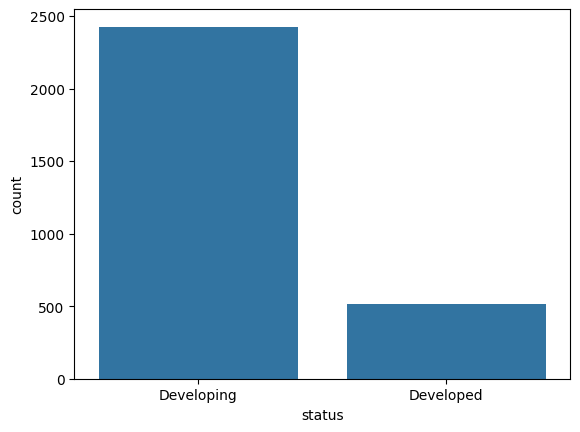

In [27]:
sns.countplot(data=df, x = 'status')

<Axes: xlabel='country', ylabel='count'>

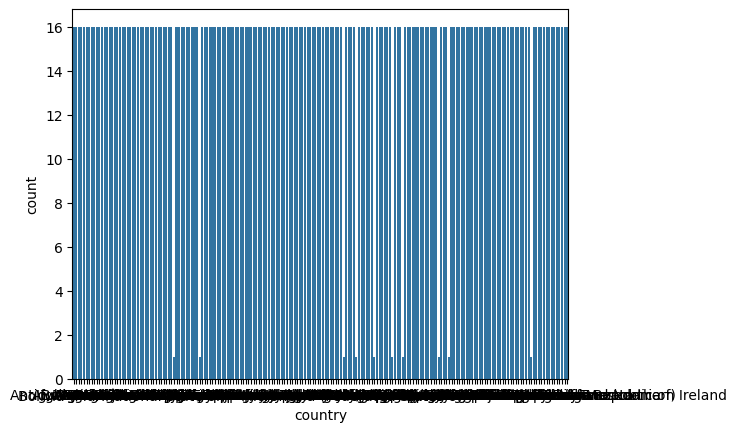

In [28]:
sns.countplot(data=df, x = 'country')

<Axes: xlabel='status', ylabel='count'>

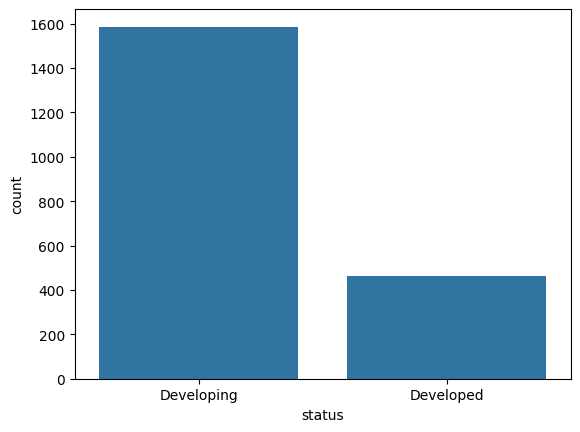

In [29]:
# task 2: look at the status, but with incom > 0.5
df_income = df[df['income'] > 0.5]
sns.countplot(data=df_income, x = 'status')

# 2.2

In [30]:
df.columns

Index(['country', 'year', 'status', 'life-exp', 'adult-mort', 'infant-deaths',
       'alcohol', 'per-exp', 'hepa', 'measles', 'bmi', 'under-five-deaths',
       'polio', 'total-exp', 'dip', 'hiv', 'gdp', 'pop', 'thin1-19', 'thin5-9',
       'income', 'school'],
      dtype='object')

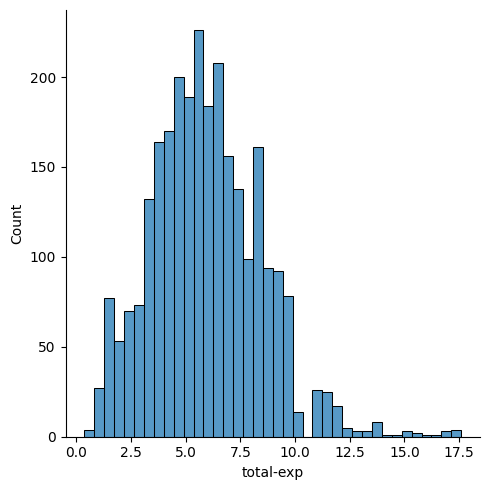

In [31]:
sns.displot(data=df, x = 'total-exp')

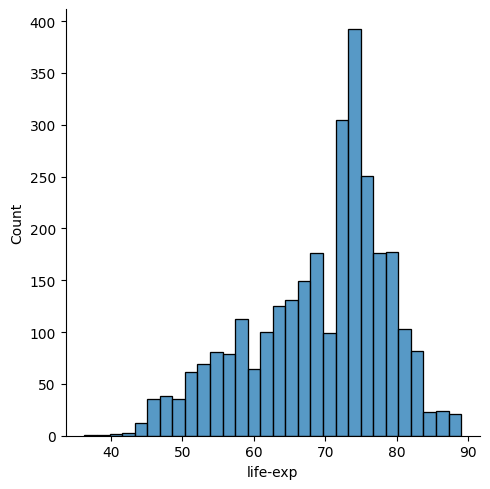

In [32]:
# task1 = try with life-exp

sns.displot(data=df, x = 'life-exp')

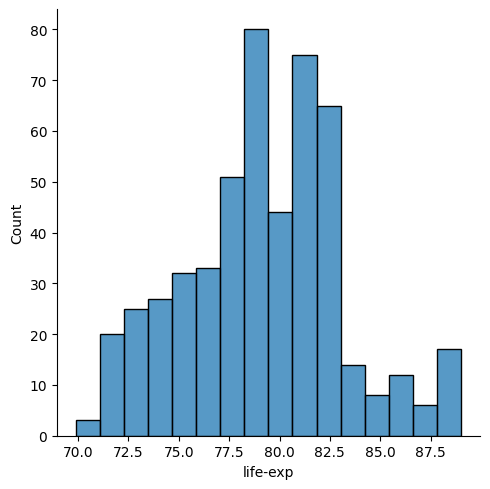

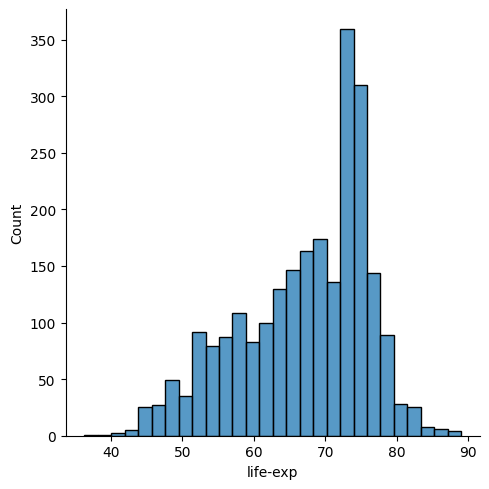

In [33]:
# task 2=  try with life-exp, with status == "Developed"  and compared with status == "Developing"

df_dev = df.status == "Developed"
df_deving = df.status == "Developing"


sns.displot(data=df[df_dev], x = 'life-exp')
sns.displot(data=df[df_deving], x = 'life-exp')





In [34]:
# 2.3
# boxplot = mostly on categorical vs one continous
# scatterplot - mostly two continuous
# pps - just like

<Axes: xlabel='status', ylabel='alcohol'>

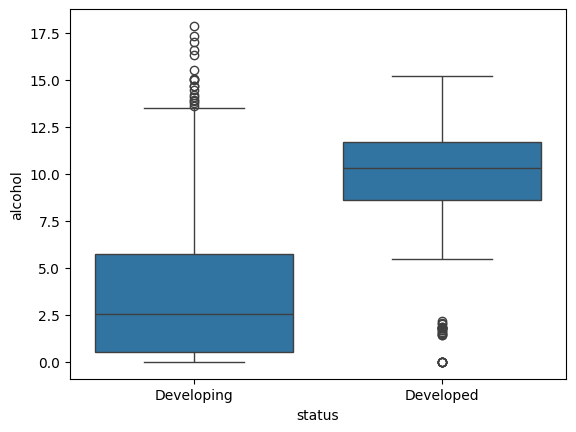

In [35]:
# boxplot = mostly on categorical vs one continous

sns.boxplot(x=df['status'], y = df['alcohol'] )

<Axes: xlabel='country', ylabel='alcohol'>

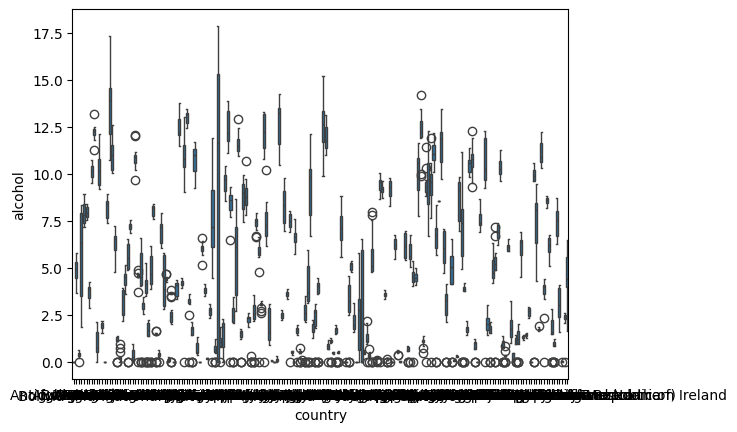

In [36]:
sns.boxplot(x = df['country'], y = df['alcohol'])

In [37]:
df.columns

Index(['country', 'year', 'status', 'life-exp', 'adult-mort', 'infant-deaths',
       'alcohol', 'per-exp', 'hepa', 'measles', 'bmi', 'under-five-deaths',
       'polio', 'total-exp', 'dip', 'hiv', 'gdp', 'pop', 'thin1-19', 'thin5-9',
       'income', 'school'],
      dtype='object')

<Axes: xlabel='status', ylabel='gdp'>

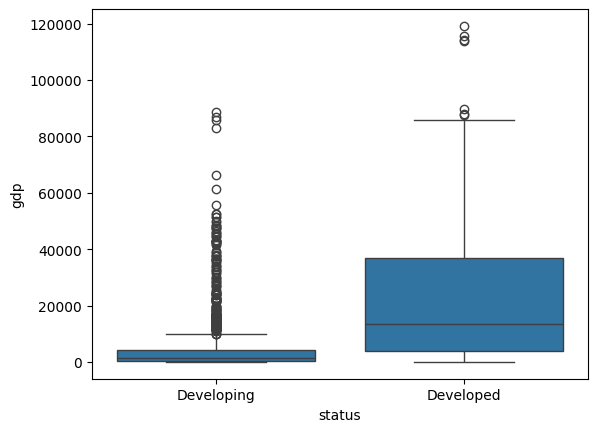

In [38]:
sns.boxplot(x=df['status'], y = df['gdp'] )

In [39]:
df.columns

Index(['country', 'year', 'status', 'life-exp', 'adult-mort', 'infant-deaths',
       'alcohol', 'per-exp', 'hepa', 'measles', 'bmi', 'under-five-deaths',
       'polio', 'total-exp', 'dip', 'hiv', 'gdp', 'pop', 'thin1-19', 'thin5-9',
       'income', 'school'],
      dtype='object')

<Axes: xlabel='school', ylabel='life-exp'>

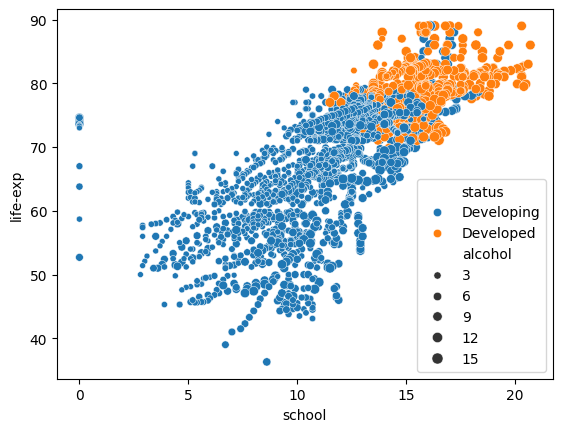

In [40]:
sns.scatterplot(x=df['school'], y = df['life-exp'], hue=df['status'], size=df['alcohol'])

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            2938 non-null   object 
 1   year               2938 non-null   int64  
 2   status             2938 non-null   object 
 3   life-exp           2928 non-null   float64
 4   adult-mort         2928 non-null   float64
 5   infant-deaths      2938 non-null   int64  
 6   alcohol            2744 non-null   float64
 7   per-exp            2938 non-null   float64
 8   hepa               2385 non-null   float64
 9   measles            2938 non-null   int64  
 10  bmi                2904 non-null   float64
 11  under-five-deaths  2938 non-null   int64  
 12  polio              2919 non-null   float64
 13  total-exp          2712 non-null   float64
 14  dip                2919 non-null   float64
 15  hiv                2938 non-null   float64
 16  gdp                2490 

In [ ]:
sns.scatterplot(x=df['school'], y = df['life-exp'], hue=df['status'], size = df['country'])

<Axes: >

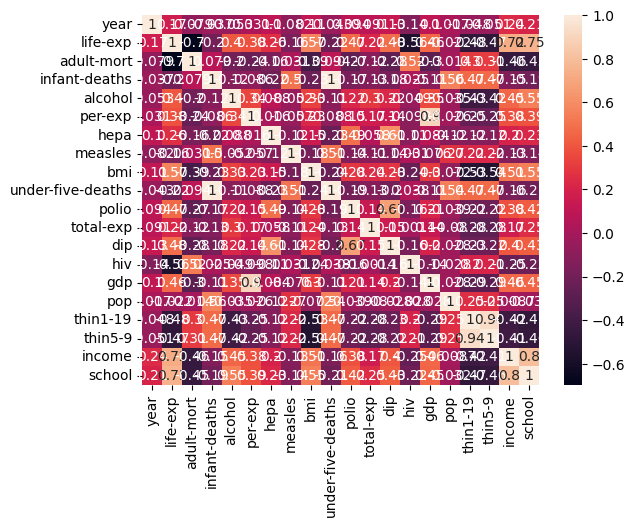

In [43]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [44]:
df_no_country = df.drop(columns=['country'])
sns.heatmap(df_no_country.corr(), annot=True)

ValueError: could not convert string to float: 'Developing'

In [45]:
# label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['status'] = le.fit_transform(df['status'])
df.head()

,country,year,status,life-exp,adult-mort,infant-deaths,alcohol,per-exp,hepa,measles,...,polio,total-exp,dip,hiv,gdp,pop,thin1-19,thin5-9,income,school
0,Afghanistan,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [46]:
df_nocountry = df.drop(columns=['country'])
df_nocountry['status'].value_counts()

status
1    2426
0     512
Name: count, dtype: int64

In [47]:
df_nocountry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               2938 non-null   int64  
 1   status             2938 non-null   int64  
 2   life-exp           2928 non-null   float64
 3   adult-mort         2928 non-null   float64
 4   infant-deaths      2938 non-null   int64  
 5   alcohol            2744 non-null   float64
 6   per-exp            2938 non-null   float64
 7   hepa               2385 non-null   float64
 8   measles            2938 non-null   int64  
 9   bmi                2904 non-null   float64
 10  under-five-deaths  2938 non-null   int64  
 11  polio              2919 non-null   float64
 12  total-exp          2712 non-null   float64
 13  dip                2919 non-null   float64
 14  hiv                2938 non-null   float64
 15  gdp                2490 non-null   float64
 16  pop                2286 

In [ ]:
from matplotlib import colormaps
list(colormaps)

<Axes: >

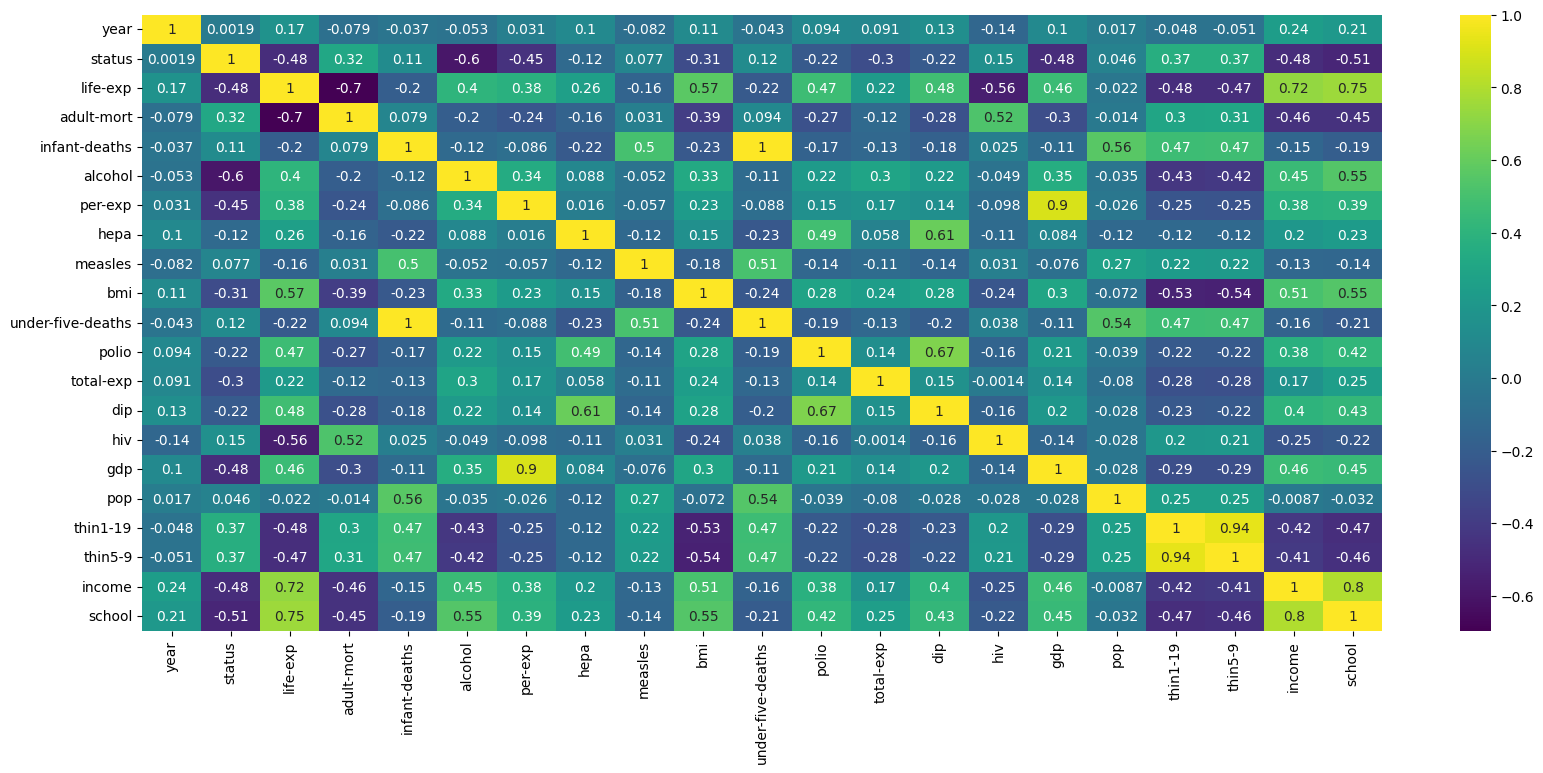

In [49]:
plt.figure(figsize=(20,8))
sns.heatmap(df_nocountry.corr(), annot=True, cmap='viridis')

In [ ]:
!pip install ppscore

In [56]:
import ppscore as pps

ModuleNotFoundError: No module named 'ppscore'

In [57]:
matrix_df  = pps.matrix(df_nocountry)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
plt.figure(figsize=(20, 8))
sns.heatmap(matrix_df, vmin=0, cmap='Blues', linewidths=0.5, annot=True)

NameError: name 'pps' is not defined

## 3. Feature Engineering

- Create new features based on existing features

## 4. Feature Selection

- Select salient features X

In [60]:
df.isna().sum()

country                0
year                   0
status                 0
life-exp              10
adult-mort            10
infant-deaths          0
alcohol              194
per-exp                0
hepa                 553
measles                0
bmi                   34
under-five-deaths      0
polio                 19
total-exp            226
dip                   19
hiv                    0
gdp                  448
pop                  652
thin1-19              34
thin5-9               34
income               167
school               163
dtype: int64

In [61]:
# base on our above correlation tables, and le
X = df_nocountry[['income', 'adult-mort']]
Y = df_nocountry['life-exp']


In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [63]:
X_train.shape

(2056, 2)

In [64]:
# task:

## 5. Preprocessing

- Imputation
- Scaling

In [65]:
X_train.isna().sum()

income        127
adult-mort      9
dtype: int64

In [66]:
X_test.isna().sum()

income        40
adult-mort     1
dtype: int64

In [67]:
y_train.isna().sum()

np.int64(9)

In [68]:
X_train['income'].median()

np.float64(0.673)

In [70]:
X_train['income'].fillna(X_train['income'].median(), inplace=True)
X_test['income'].fillna(X_train['income'].median(), inplace=True)

C:\Users\hoang\AppData\Local\Temp\ipykernel_7104\483470001.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['income'].fillna(X_train['income'].median(), inplace=True)
C:\Users\hoang\AppData\Local\Temp\ipykernel_7104\483470001.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [71]:
X_train['adult-mort'].fillna(X_train['adult-mort'].median(), inplace=True)
X_test['adult-mort'].fillna(X_train['adult-mort'].median(), inplace=True)

C:\Users\hoang\AppData\Local\Temp\ipykernel_7104\2442082073.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['adult-mort'].fillna(X_train['adult-mort'].median(), inplace=True)
C:\Users\hoang\AppData\Local\Temp\ipykernel_7104\2442082073.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

In [86]:
X_train.isna().sum()

income        127
adult-mort      8
dtype: int64

In [87]:
y_train.isna().sum()

np.int64(8)

## 6. Modeling

- Compare all regression models using cross validation
- Once you got the best model, do cross validation on only one model with different parameters "Grid search"

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


lr = LinearRegression()

lr.fit(X_train, y_train)

yhat = lr.predict(X_test)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

## 7. Testing

- Test your model on test set (you should never touch your test set until now)

In [ ]:
from sklearn.neighbors import KneighborsRegressor
from sklearn.

## 8. Analysis

- Try to come up with explanation of your model
- What works?  What features are important?
- Why certain models work better?
- How many samples are enough?

## 9. Inference

- Test with real-world data
- You don't really know how good is your model, you just try it

## 10. Deployment

- We gonna skip this, but you have at least beware that there is still a lot to do in deployment

- Deploy your model using FastAPI.  How to host your model in AWS / Azure.